In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer()

In [3]:
X = data.data

In [4]:
y = data.target

In [5]:
from sklearn.model_selection import ShuffleSplit

In [7]:
ss = ShuffleSplit(n_splits=1, train_size=0.8, test_size=0.2, random_state=0)
train_index, test_index = next(ss.split(X, y))
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [8]:
from sklearn import linear_model

In [9]:
clf = linear_model.LogisticRegression()

In [10]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
clf.score(X_train, y_train)

0.95824175824175828

In [13]:
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1])

In [14]:
np.count_nonzero(y_test==0), np.count_nonzero(y_test==1)

(47, 67)

In [15]:
y_pred = clf.predict(X_test)

In [16]:
conf_mat = np.zeros( [2,2] )

In [17]:
for true_label, est_label in zip(y_test, y_pred):
    conf_mat[true_label, est_label] += 1

In [18]:
conf_mat

array([[ 46.,   1.],
       [  4.,  63.]])

In [20]:
import pandas as pd
df = pd.DataFrame(conf_mat, columns=["pred 0", "pred 1"], index=['true 0', 'true 1'])

In [21]:
df

,pred 0,pred 1
true 0,46.0,1.0
true 1,4.0,63.0


In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [23]:
cmat = confusion_matrix(y_test, y_pred)

In [24]:
cmat

array([[46,  1],
       [ 4, 63]])

In [26]:
TP = cmat[0,0]

In [27]:
TP

46

In [29]:
# print(data.DESCR)

In [34]:
TF = cmat[1,1]

In [31]:
TF

4

In [35]:
FP = cmat[1, 0]

In [33]:
FP

4

In [36]:
FN = cmat[0, 1]

In [38]:
FN

1

In [39]:
from sklearn.datasets import load_digits

In [40]:
data = load_digits()

In [41]:
X = data.data

In [42]:
y = data.target

In [43]:
img = data.images

In [46]:
X[0].shape, img[0].shape

((64,), (8, 8))

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

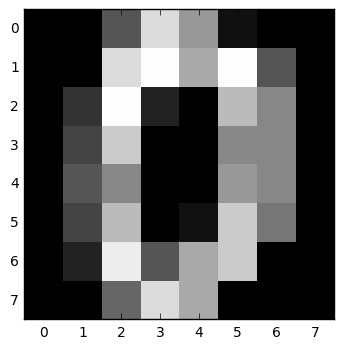

In [53]:
plt.imshow(img[0], interpolation='none')
plt.gray()

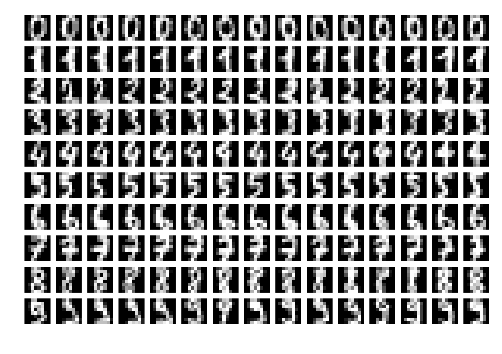

In [55]:
for i in range(10):
    i_th_digit = data.images[data.target == i]
    for j in range(0, 15):
        plt.subplot(10, 15, i * 15 + j + 1)
        plt.axis('off')
        plt.imshow(i_th_digit[j], interpolation='none')

In [56]:
from sklearn.model_selection import ShuffleSplit

In [57]:
ss = ShuffleSplit(n_splits=1, train_size=0.8, test_size=0.2, random_state=0)

In [58]:
train_index, test_index = next(ss.split(X, y))

In [59]:
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [60]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [61]:
clf.score(X_test, y_test)

0.94999999999999996

In [63]:
y_pred = clf.predict(X_test)

In [65]:
accuracy_score(y_test, y_pred)

0.94999999999999996

In [66]:
conf_mat = confusion_matrix(y_test, y_pred)

In [68]:
df = pd.DataFrame(conf_mat, columns=range(0,10), index=range(0,10))

In [70]:
print(df)

    0   1   2   3   4   5   6   7   8   9
0  27   0   0   0   0   0   0   0   0   0
1   0  31   0   0   0   0   1   0   3   0
2   0   0  34   2   0   0   0   0   0   0
3   0   0   0  29   0   0   0   0   0   0
4   0   0   0   0  30   0   0   0   0   0
5   0   0   0   0   0  39   0   0   0   1
6   0   1   0   0   0   0  43   0   0   0
7   0   1   0   0   1   0   0  37   0   0
8   0   2   1   0   0   0   0   0  35   1
9   0   0   0   1   0   1   0   0   2  37


In [71]:
df

,0,1,2,3,4,5,6,7,8,9
0,27,0,0,0,0,0,0,0,0,0
1,0,31,0,0,0,0,1,0,3,0
2,0,0,34,2,0,0,0,0,0,0
3,0,0,0,29,0,0,0,0,0,0
4,0,0,0,0,30,0,0,0,0,0
5,0,0,0,0,0,39,0,0,0,1
6,0,1,0,0,0,0,43,0,0,0
7,0,1,0,0,1,0,0,37,0,0
8,0,2,1,0,0,0,0,0,35,1
9,0,0,0,1,0,1,0,0,2,37


In [72]:
from sklearn.decomposition import PCA

In [73]:
pca = PCA(whiten=True)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [74]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

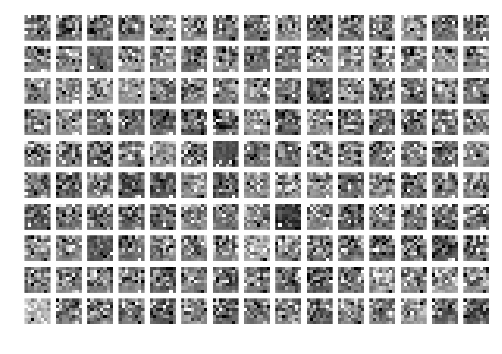

In [75]:
for i in range(10):
    i_th_digit = X_train_pca[y_train == i]
    for j in range(0, 15):
        plt.subplot(10, 15, i * 15 + j  + 1)
        plt.axis('off')
        plt.imshow(i_th_digit[j].reshape(8, 8), interpolation='none')

In [78]:
clf.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [79]:
clf.score(X_test_pca, y_test)

0.9555555555555556

In [80]:
X_train_zca = X_train_pca.dot(pca.components_)
X_test_zca = X_test_pca.dot(pca.components_)

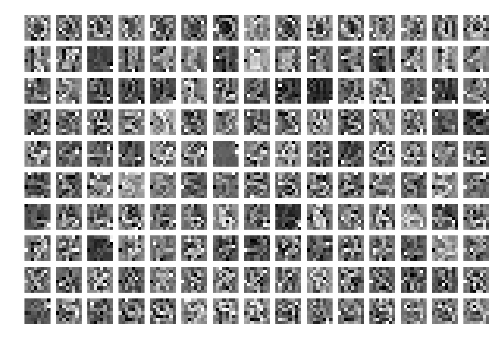

In [81]:
for i in range(10):
    i_th_digit = X_train_zca[y_train == i]
    for j in range(0, 15):
        plt.subplot(10, 15, i * 15 + j  + 1)
        plt.axis('off')
        plt.imshow(i_th_digit[j].reshape(8, 8), interpolation='none')

In [82]:
clf.fit(X_train_zca, y_train)
clf.score(X_test_zca, y_test)

0.9555555555555556

In [84]:
scores = []
for i in range(1, 65):
    clf.fit(X_train_pca[:, 0:i], y_train)
    score = clf.score(X_test_pca[:, 0:i], y_test)
    print(i, score)
    scores.append(score)

scores  = np.array(scores)

(1, 0.32777777777777778)
(2, 0.53611111111111109)
(3, 0.6333333333333333)
(4, 0.7583333333333333)
(5, 0.80000000000000004)
(6, 0.81111111111111112)
(7, 0.8666666666666667)
(8, 0.875)
(9, 0.90277777777777779)
(10, 0.91111111111111109)
(11, 0.93611111111111112)
(12, 0.93888888888888888)
(13, 0.93333333333333335)
(14, 0.93611111111111112)
(15, 0.93611111111111112)
(16, 0.94166666666666665)
(17, 0.94999999999999996)
(18, 0.94722222222222219)
(19, 0.94999999999999996)
(20, 0.94999999999999996)
(21, 0.94999999999999996)
(22, 0.95277777777777772)
(23, 0.95277777777777772)
(24, 0.94999999999999996)
(25, 0.94444444444444442)
(26, 0.94722222222222219)
(27, 0.94722222222222219)
(28, 0.95277777777777772)
(29, 0.9555555555555556)
(30, 0.94722222222222219)
(31, 0.94999999999999996)
(32, 0.94999999999999996)
(33, 0.95277777777777772)
(34, 0.95277777777777772)
(35, 0.94999999999999996)
(36, 0.94999999999999996)
(37, 0.95277777777777772)
(38, 0.94722222222222219)
(39, 0.9555555555555556)
(40, 0.9527777

(0.9, 1)

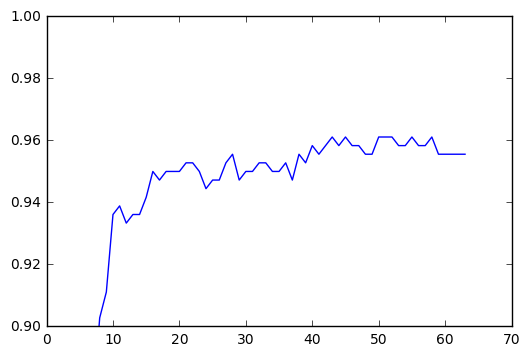

In [86]:
plt.plot(scores)
plt.ylim(0.9, 1)

In [87]:
from sklearn.datasets import load_breast_cancer

In [88]:
data = load_breast_cancer()

In [89]:
X = data.data

In [90]:
y = data.target

In [95]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, train_size=0.8, test_size=0.2, random_state=0)

train_index, test_index = next(ss.split(X, y))
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [92]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()

In [96]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [97]:
clf.score(X_test, y_test)

0.95614035087719296

In [98]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [99]:
y_pred = clf.predict(X_test)
cmat = confusion_matrix(y_test, y_pred)

In [100]:
cmat

array([[46,  1],
       [ 4, 63]])

In [101]:
accuracy_score(y_test, y_pred)

0.95614035087719296

In [102]:
cmat.sum()

114

In [103]:
cmat.diagonal().sum()

109

In [105]:
cmat.diagonal().sum() / float(cmat.sum())

0.95614035087719296

In [106]:
TP = cmat[0, 0]
TN = cmat[1,1]
FP = cmat[1, 0]
FN = cmat[0, 1]

In [107]:
from sklearn.metrics import classification_report

In [108]:
print(classification_report(y_test, y_pred, digits=4))

             precision    recall  f1-score   support

          0     0.9200    0.9787    0.9485        47
          1     0.9844    0.9403    0.9618        67

avg / total     0.9578    0.9561    0.9563       114



In [109]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, beta=1)

(array([ 0.92    ,  0.984375]),
 array([ 0.9787234 ,  0.94029851]),
 array([ 0.94845361,  0.96183206]),
 array([47, 67]))

In [111]:
from sklearn.datasets import load_digits
data = load_digits()

In [112]:
X = data.data
y = data.target

In [113]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, train_size=0.8, test_size=0.2, random_state=0)

train_index, test_index = next(ss.split(X, y))
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [114]:
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [115]:
clf.score(X_test, y_test)

0.94999999999999996

In [116]:
y_pred = clf.predict(X_test)

In [117]:
confusion_matrix(y_test, y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  1,  0,  3,  0],
       [ 0,  0, 34,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0, 37,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 35,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  2, 37]])

In [119]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        27
          1       0.89      0.89      0.89        35
          2       0.97      0.94      0.96        36
          3       0.91      1.00      0.95        29
          4       0.97      1.00      0.98        30
          5       0.97      0.97      0.97        40
          6       0.98      0.98      0.98        44
          7       1.00      0.95      0.97        39
          8       0.88      0.90      0.89        39
          9       0.95      0.90      0.92        41

avg / total       0.95      0.95      0.95       360



In [120]:
data = load_breast_cancer()

In [121]:
X = data.data
y = data.target

In [122]:
ss = ShuffleSplit(n_splits=1, train_size=0.8, test_size=0.2, random_state=0)

train_index, test_index = next(ss.split(X, y))
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]


In [123]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()

In [124]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [125]:
clf.score(X_test, y_test)

0.95614035087719296

In [126]:
y_pred = clf.predict(X_test)

In [127]:
accuracy_score(y_test, y_pred)

0.95614035087719296

In [128]:
confusion_matrix(y_test, y_pred)

array([[46,  1],
       [ 4, 63]])

In [130]:
X_test[0]

array([  1.34000000e+01,   2.05200000e+01,   8.86400000e+01,
         5.56700000e+02,   1.10600000e-01,   1.46900000e-01,
         1.44500000e-01,   8.17200000e-02,   2.11600000e-01,
         7.32500000e-02,   3.90600000e-01,   9.30600000e-01,
         3.09300000e+00,   3.36700000e+01,   5.41400000e-03,
         2.26500000e-02,   3.45200000e-02,   1.33400000e-02,
         1.70500000e-02,   4.00500000e-03,   1.64100000e+01,
         2.96600000e+01,   1.13300000e+02,   8.44400000e+02,
         1.57400000e-01,   3.85600000e-01,   5.10600000e-01,
         2.05100000e-01,   3.58500000e-01,   1.10900000e-01])

In [131]:
from sklearn.metrics import roc_curve, auc, average_precision_score, precision_recall_curve


('AUC = ', 0.99428389965068276)


(-0.01, 1.01)

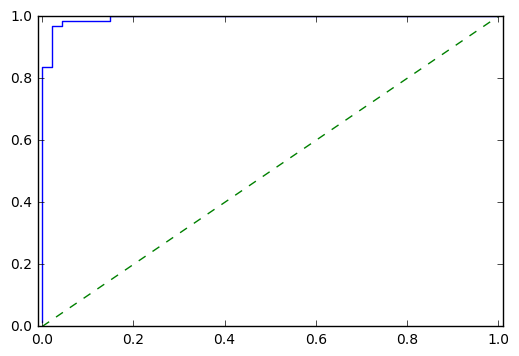

In [134]:
test_score = clf.decision_function(X_test)
fpr, tpr, th = roc_curve(y_test, test_score)
plt.plot(fpr, tpr)
print("AUC = ", auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([-0.01, 1.01])

In [135]:
test_score = clf.decision_function(X_test)
precision, recall, th = precision_recall_curve(y_test, test_score)

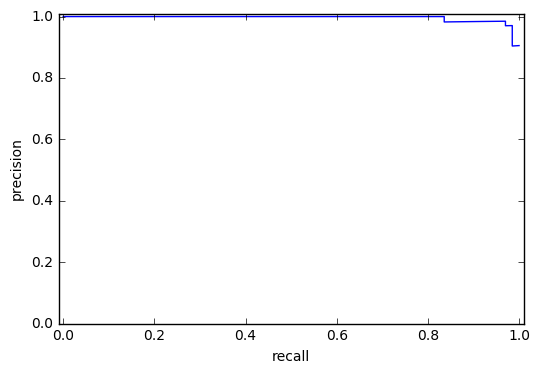

In [136]:
plt.plot(recall, precision)
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('recall')
plt.ylabel('precision')

In [137]:
data = load_digits()

In [138]:
X = data.data
y = data.target

In [139]:
ss = ShuffleSplit(n_splits=1, train_size=0.8, test_size=0.2, random_state=0)
train_index, test_index = next(ss.split(X, y))
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [140]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [141]:
clf.score(X_test, y_test)

0.94999999999999996

In [142]:
test_score = clf.decision_function(X_test)

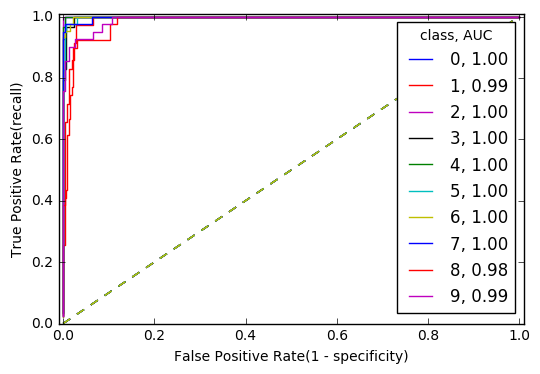

In [143]:
for i in range(10):
    fpr, tpr, _ = roc_curve((y_test == i).astype(int), test_score[:, i])
    plt.plot(fpr, tpr, label="{0}, {1:.2f}".format(i,  auc(fpr, tpr)))
    
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.legend(loc="best", title='class, AUC')
    plt.xlim([-0.01, 1.01])
    plt.ylim([0.0, 1.01])
    plt.ylabel('True Positive Rate(recall)')
    plt.xlabel('False Positive Rate(1 - specificity)')
    